# Kaggle: Corporacion Favorita Grocery Sales Forecasting

https://www.kaggle.com/c/favorita-grocery-sales-forecasting/

Import libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer

%matplotlib inline

## Read data

In [19]:
#train = pd.read_csv("data/raw/train.csv", dtype={"id": int, 
#                                                 "date": str,
#                                                 "store_nbr": str,
#                                                 "item_nbr": str,
#                                                 "unit_sales": int,
#                                                 "onpromotion": int
#                                                })
train = pd.read_csv("data/raw/train.csv")

In [20]:
train.columns

Index([u'id', u'date', u'store_nbr', u'item_nbr', u'unit_sales',
       u'onpromotion'],
      dtype='object')

In [28]:
for i in range(len(train.columns)):
    print train.columns[i], type(train.columns[i])

id <type 'str'>
date <type 'str'>
store_nbr <type 'str'>
item_nbr <type 'str'>
unit_sales <type 'str'>
onpromotion <type 'str'>


In [29]:
for column_name in train.columns:
    print column_name, train[column_name].dtype

id int64
date datetime64[ns]
store_nbr int64
item_nbr int64
unit_sales float64
onpromotion object


In [22]:
items = pd.read_csv("data/raw/items.csv")
holidays_events = pd.read_csv("data/raw/holidays_events.csv")
oil = pd.read_csv("data/raw/oil.csv")
stores = pd.read_csv("data/raw/stores.csv")
transactions = pd.read_csv("data/raw/transactions.csv")
test = pd.read_csv("data/raw/test.csv")
sample_submission = pd.read_csv("data/raw/sample_submission.csv")

Convert date to datetime:

In [23]:
train["date"] = pd.to_datetime(train["date"])

In [30]:
train.columns[1], type(train.columns[1]), type(train["date"]), train["date"].dtype

date <type 'str'> <class 'pandas.core.series.Series'> datetime64[ns]


In [32]:
print holidays_events["date"].dtype

object


In [6]:
holidays_events["date"] = pd.to_datetime(holidays_events["date"])
oil["date"] = pd.to_datetime(oil['date'])
transactions["date"] = pd.to_datetime(transactions['date'])

In [41]:
items["perishable"].value_counts()

0    3114
1     986
Name: perishable, dtype: int64

## Exploratory Data Analysis

All dataframes:

In [71]:
dfs = {
    "train": train, 
    "items": items, 
    "holidays_events": holidays_events,
    "oil": oil, 
    "stores": stores, 
    "transactions": transactions,
    "test": test
}

In [74]:
# Null values
for name, df in dfs.iteritems():
    print "Table", name, "Shape", df.shape
    print df.isnull().sum().sort_values(ascending=False).head(2)
    print

Table oil Shape (1218, 2)
dcoilwtico    43
date           0
dtype: int64

Table stores Shape (54, 5)
cluster    0
type       0
dtype: int64

Table transactions Shape (83488, 3)
transactions    0
store_nbr       0
dtype: int64

Table items Shape (4100, 4)
perishable    0
class         0
dtype: int64

Table train Shape (125497040, 6)
onpromotion    21657651
unit_sales            0
dtype: int64

Table holidays_events Shape (350, 6)
transferred    0
description    0
dtype: int64

Table test Shape (3370464, 5)
onpromotion    0
item_nbr       0
dtype: int64



### Train table:

In [10]:
train.shape

(125497040, 6)

In [11]:
train_grouped = train.groupby('date', as_index=False).sum()

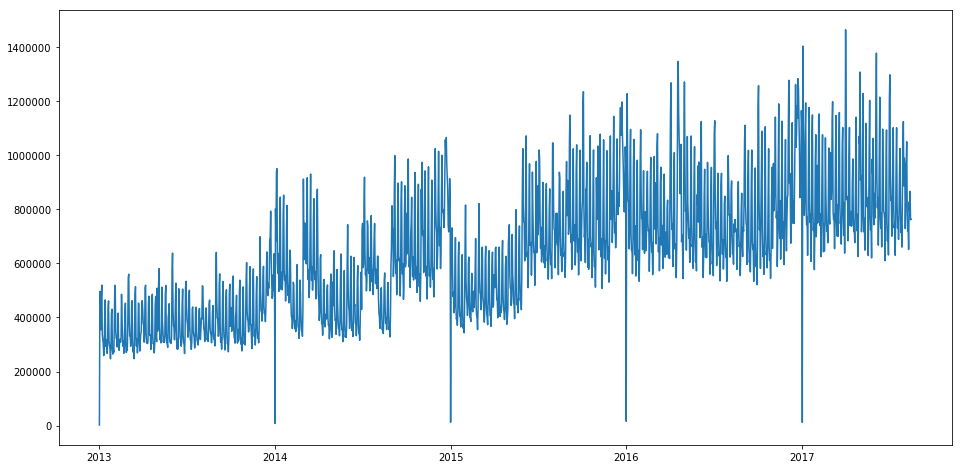

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(train_grouped["date"], train_grouped["unit_sales"])
plt.show()

In [15]:
###########################################
###########################################
# TEST: too much data to work with
###########################################
###########################################
train_2016 = train[train["date"].dt.year == 2016]
###########################################
###########################################
###########################################
###########################################
###########################################

In [16]:
train_2016.shape

(35229871, 6)

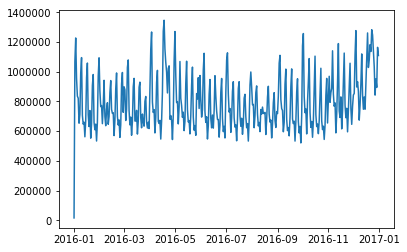

In [17]:
train_2016_grouped = train_2016.groupby('date', as_index=False).sum()
plt.figure(figsize=(9, 8))
plt.plot(train_2016_grouped["date"], train_2016_grouped["unit_sales"])
plt.show()

In [18]:
train_2016_grouped.head(2)

,date,id,store_nbr,item_nbr,unit_sales
0,2016-01-01,114177878847,42950,1813786953,16433.394
1,2016-01-02,6706308213615,2777155,107138481918,1066677.424


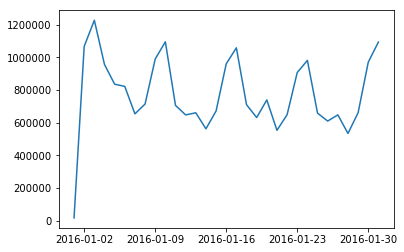

In [20]:
train_2016_January = train_2016[train_2016["date"].dt.month == 1]
train_2016_January_grouped = train_2016_January.groupby('date', as_index=False).sum()
plt.figure(figsize=(9, 8))
plt.plot(train_2016_January_grouped["date"], train_2016_January_grouped["unit_sales"])
plt.show()

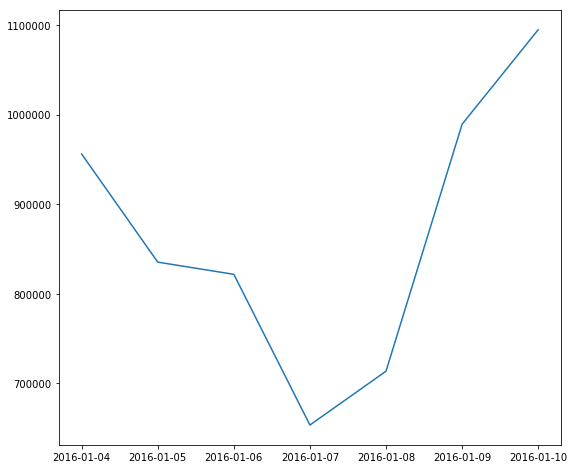

In [23]:
train_2016_January_week = train_2016_January[train_2016_January["date"].dt.week == 1]
train_2016_January_week_grouped = train_2016_January_week.groupby('date', as_index=False).sum()
plt.figure(figsize=(9, 8))
plt.plot(train_2016_January_week_grouped["date"], train_2016_January_week_grouped["unit_sales"])
plt.show()

### Transactions table:

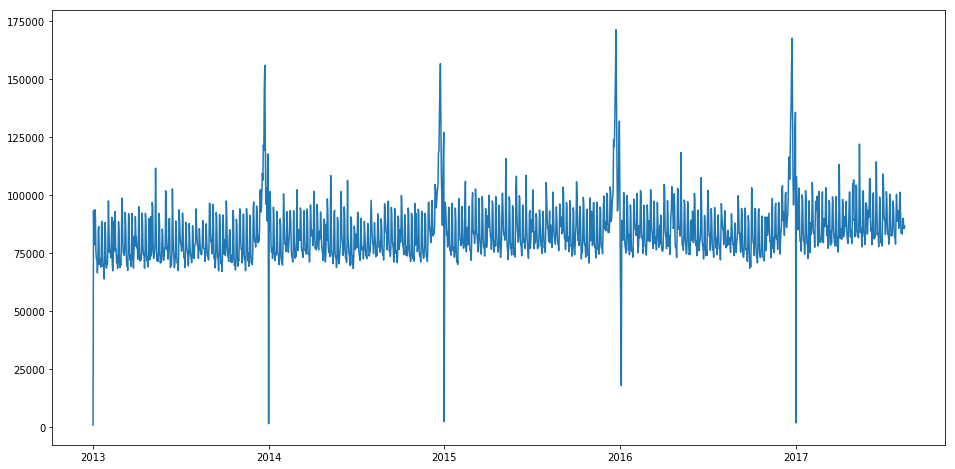

In [15]:
transactions_grouped = transactions.groupby('date', as_index=False).sum()
plt.figure(figsize=(16, 8))
plt.plot(transactions_grouped["date"], transactions_grouped["transactions"])
plt.show()

### Holidays events table:

In [88]:
print holidays_events['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64


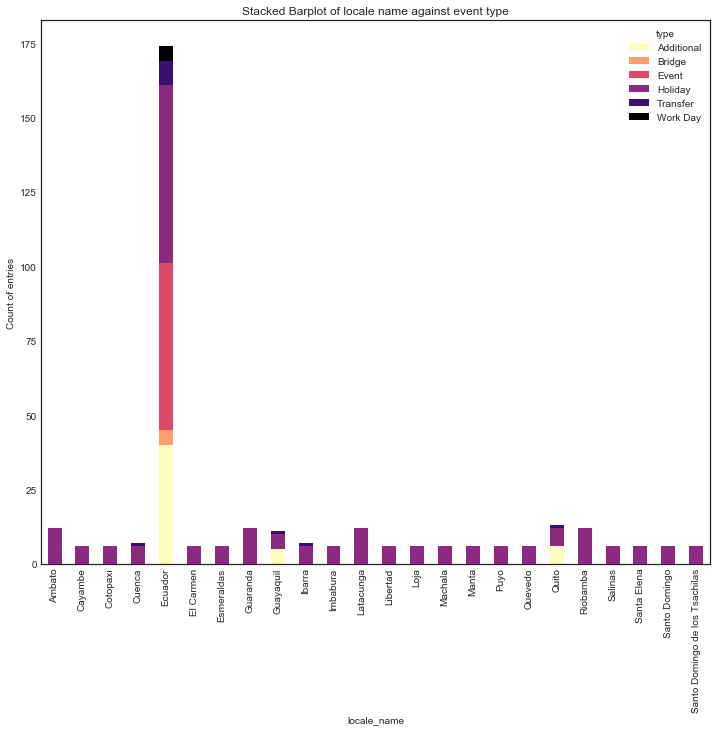

In [18]:
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
holiday_local_type = holidays_events.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

### Stores:

In [23]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [24]:
stores.city.unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'], dtype=object)

In [22]:
stores.state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [36]:
print stores['type'].value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64


### Items:

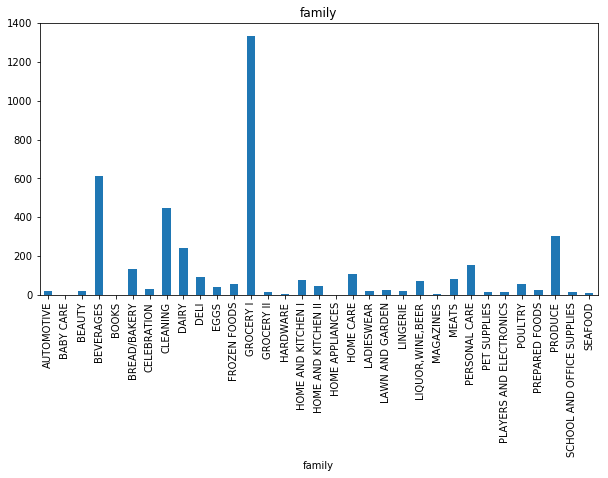

In [165]:
# Murong's 
k = items.groupby(['family'])['family'].count()
k.plot.bar(
    subplots = True, x = items['family'], figsize = (10,5), legend = None)
plt.show()

### Oil table:

In [7]:
def plot_oil():
    plt.figure(figsize=(16, 8))
    plt.plot(oil["date"], oil["dcoilwtico"])
    plt.show()

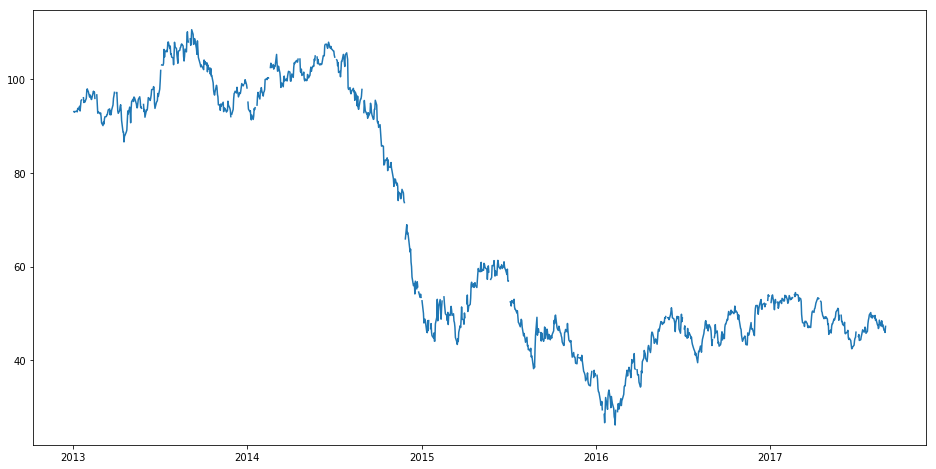

In [8]:
plot_oil()

## Handling missing data

Oil data:

In [9]:
# Previous and next
#oil['prev_dcoilwtico'] = oil['dcoilwtico'].shift(+1)
#oil['next_dcoilwtico'] = oil['dcoilwtico'].shift(-1)

In [10]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [11]:
import math
x = float('nan')
math.isnan(x)

True

Propagate non-null values forward:

In [12]:
oil.fillna(method='ffill', inplace=True)

In [13]:
oil.isnull().sum().sort_values(ascending=False)

dcoilwtico    1
date          0
dtype: int64

Propagate non-null values backward so we modify the first row:

In [14]:
oil.fillna(method='bfill', inplace=True)

In [15]:
oil.isnull().sum().sort_values(ascending=False)

dcoilwtico    0
date          0
dtype: int64

In [16]:
oil.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


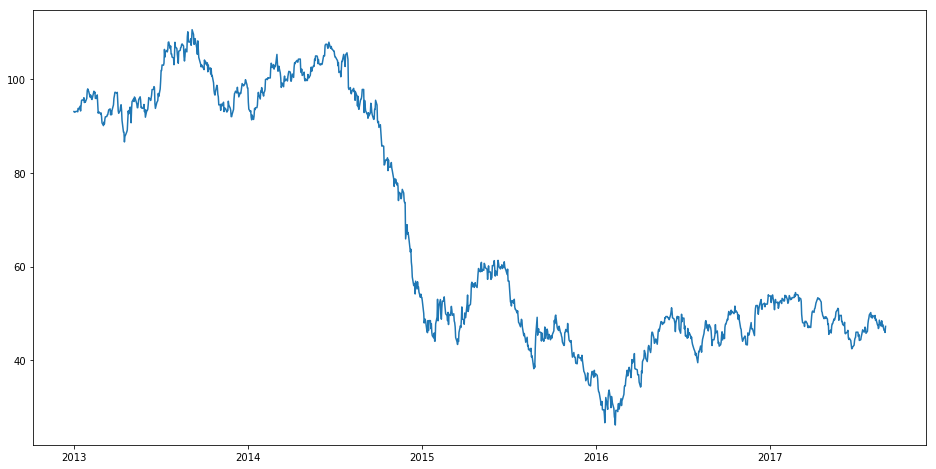

In [17]:
plot_oil()

Onpromotion column in train:

In [18]:
# Impute missing values using Imputer in sklearn.preprocessing
Imputer?

In [19]:
train.isnull().sum().sort_values(ascending=False).head()

onpromotion    21657651
unit_sales            0
item_nbr              0
store_nbr             0
date                  0
dtype: int64

In [20]:
train['onpromotion'].value_counts(dropna=False)

False    96028767
NaN      21657651
True      7810622
Name: onpromotion, dtype: int64

In [21]:
imp = Imputer(missing_values='NaN', strategy='most_frequent')
imp

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [22]:
train["onpromotion"] = imp.fit_transform(train[["onpromotion"]]).ravel()

In [23]:
train['onpromotion'].value_counts(dropna=False)

0.0    117686418
1.0      7810622
Name: onpromotion, dtype: int64

In [24]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,0.0
1,1,2013-01-01,25,105574,1.0,0.0
2,2,2013-01-01,25,105575,2.0,0.0
3,3,2013-01-01,25,108079,1.0,0.0
4,4,2013-01-01,25,108701,1.0,0.0


In [ ]:
#train['onpromotion'] = w['onpromotion'].map({'True': 1, 'False': 0})

## Feature engineering

### Develop features

In [25]:
###########################################
###########################################
# TEST: too much data to work with
###########################################
###########################################
train_2016 = train[train["date"].dt.year == 2016]

In [144]:
train_2016.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month
66458908,66458908,2016-01-01,25,105574,12.0,False,1
66458909,66458909,2016-01-01,25,105575,9.0,False,1
66458910,66458910,2016-01-01,25,105857,3.0,False,1
66458911,66458911,2016-01-01,25,108634,3.0,False,1
66458912,66458912,2016-01-01,25,108701,2.0,True,1


In [28]:
train_2016["day_of_the_week"] = train_2016["date"].dt.dayofweek

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
train_2016.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day_of_the_week
66458908,66458908,2016-01-01,25,105574,12.0,0.0,4
66458909,66458909,2016-01-01,25,105575,9.0,0.0,4
66458910,66458910,2016-01-01,25,105857,3.0,0.0,4
66458911,66458911,2016-01-01,25,108634,3.0,0.0,4
66458912,66458912,2016-01-01,25,108701,2.0,1.0,4


NO NEED TO DO ALL THIS:

In [145]:
date_list = np.unique(train_2016["date"])

In [146]:
print date_list.min()
print date_list.max()

2016-01-01T00:00:00.000000000
2016-12-31T00:00:00.000000000


In [147]:
train_2016["month"] = train_2016["date"].dt.month

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
date_list = pd.DataFrame(date_list)

In [149]:
date_list.head()
# date_list.tail()

,0
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [150]:
date_list["day"] = range(1, np.shape(date_list)[0] + 1)

In [151]:
date_list.head(10)

,0,day
0,2016-01-01,1
1,2016-01-02,2
2,2016-01-03,3
3,2016-01-04,4
4,2016-01-05,5
5,2016-01-06,6
6,2016-01-07,7
7,2016-01-08,8
8,2016-01-09,9
9,2016-01-10,10


In [152]:
date_list["day"] = date_list["day"] % 7

In [153]:
date_list.head(10)

,0,day
0,2016-01-01,1
1,2016-01-02,2
2,2016-01-03,3
3,2016-01-04,4
4,2016-01-05,5
5,2016-01-06,6
6,2016-01-07,0
7,2016-01-08,1
8,2016-01-09,2
9,2016-01-10,3


In [154]:
date_list.columns=["date", "day of week"]

In [155]:
date_list.head(2)

,date,day of week
0,2016-01-01,1
1,2016-01-02,2


In [156]:
train_2016 = pd.merge(train_2016, date_list, on=["date"], how="left")

In [157]:
train_2016.head(2)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month,day of week
0,66458908,2016-01-01,25,105574,12.0,False,1,1
1,66458909,2016-01-01,25,105575,9.0,False,1,1


In [158]:
train_2016.drop("date", axis=1, inplace=True)
train_2016.drop("id", axis=1, inplace=True)
train_2016.reset_index(inplace=True)
train_2016.drop("index", axis=1, inplace=True)

In [159]:
train_2016.head()

,store_nbr,item_nbr,unit_sales,onpromotion,month,day of week
0,25,105574,12.0,False,1,1
1,25,105575,9.0,False,1,1
2,25,105857,3.0,False,1,1
3,25,108634,3.0,False,1,1
4,25,108701,2.0,True,1,1


In [160]:
del date_list

## Merge

In [30]:
train_2016 = train_2016.merge(stores, how='left', on='store_nbr')

In [31]:
print train_2016.columns
train_2016.head(2)

Index([u'id', u'date', u'store_nbr', u'item_nbr', u'unit_sales',
       u'onpromotion', u'day_of_the_week', u'city', u'state', u'type',
       u'cluster'],
      dtype='object')


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day_of_the_week,city,state,type,cluster
0,66458908,2016-01-01,25,105574,12.0,0.0,4,Salinas,Santa Elena,D,1
1,66458909,2016-01-01,25,105575,9.0,0.0,4,Salinas,Santa Elena,D,1


In [32]:
train_2016 = train_2016.merge(transactions, how='left', on=['date', 'store_nbr'])

In [33]:
print train_2016.columns
train_2016.head(2)

Index([u'id', u'date', u'store_nbr', u'item_nbr', u'unit_sales',
       u'onpromotion', u'day_of_the_week', u'city', u'state', u'type',
       u'cluster', u'transactions'],
      dtype='object')


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day_of_the_week,city,state,type,cluster,transactions
0,66458908,2016-01-01,25,105574,12.0,0.0,4,Salinas,Santa Elena,D,1,NaN
1,66458909,2016-01-01,25,105575,9.0,0.0,4,Salinas,Santa Elena,D,1,NaN


In [34]:
train_2016 = train_2016.merge(oil, how='left', on='date')

In [35]:
print train_2016.columns
train_2016.head(2)

Index([u'id', u'date', u'store_nbr', u'item_nbr', u'unit_sales',
       u'onpromotion', u'day_of_the_week', u'city', u'state', u'type',
       u'cluster', u'transactions', u'dcoilwtico'],
      dtype='object')


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day_of_the_week,city,state,type,cluster,transactions,dcoilwtico
0,66458908,2016-01-01,25,105574,12.0,0.0,4,Salinas,Santa Elena,D,1,NaN,37.13
1,66458909,2016-01-01,25,105575,9.0,0.0,4,Salinas,Santa Elena,D,1,NaN,37.13


In [ ]:
# X_6 = X_6.rename(columns = {'type':'holiday_type'})

In [37]:
train_2016.isnull().sum().sort_values(ascending=False).head()

dcoilwtico      10663202
transactions      210328
cluster                0
type                   0
state                  0
dtype: int64

In [39]:
imp = Imputer(missing_values='NaN', strategy='mean')
imp

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [41]:
train_2016["transactions"] = imp.fit_transform(train_2016[["transactions"]]).ravel()

In [43]:
train_2016.isnull().sum().sort_values(ascending=False).head()

dcoilwtico      10663202
transactions           0
cluster                0
type                   0
state                  0
dtype: int64

In [44]:
train_2016["dcoilwtico"] = imp.fit_transform(train_2016[["dcoilwtico"]]).ravel()

In [45]:
train_2016.isnull().sum().sort_values(ascending=False).head()

dcoilwtico      0
transactions    0
cluster         0
type            0
state           0
dtype: int64

Change strategy to fill null values

In [ ]:
integrate holidays_events and items..

## One-hot encoding

In [47]:
one_hot_encoding_features = []
for col_name in train_2016.columns:
    if train_2016[col_name].dtypes == 'object':
        unique_cat = len(train_2016[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        one_hot_encoding_features.append(col_name)

Feature 'city' has 22 unique categories
Feature 'state' has 16 unique categories
Feature 'type' has 5 unique categories


In [48]:
one_hot_encoding_features

['city', 'state', 'type']

In [49]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [50]:
train_2016 = dummy_df(train_2016, one_hot_encoding_features)

In [53]:
print train_2016.columns
print "Number of columns", len(train_2016.columns)

 Index([u'id', u'date', u'store_nbr', u'item_nbr', u'unit_sales',
       u'onpromotion', u'day_of_the_week', u'cluster', u'transactions',
       u'dcoilwtico', u'city_Ambato', u'city_Babahoyo', u'city_Cayambe',
       u'city_Cuenca', u'city_Daule', u'city_El Carmen', u'city_Esmeraldas',
       u'city_Guaranda', u'city_Guayaquil', u'city_Ibarra', u'city_Latacunga',
       u'city_Libertad', u'city_Loja', u'city_Machala', u'city_Manta',
       u'city_Playas', u'city_Puyo', u'city_Quevedo', u'city_Quito',
       u'city_Riobamba', u'city_Salinas', u'city_Santo Domingo',
       u'state_Azuay', u'state_Bolivar', u'state_Chimborazo',
       u'state_Cotopaxi', u'state_El Oro', u'state_Esmeraldas',
       u'state_Guayas', u'state_Imbabura', u'state_Loja', u'state_Los Rios',
       u'state_Manabi', u'state_Pastaza', u'state_Pichincha',
       u'state_Santa Elena', u'state_Santo Domingo de los Tsachilas',
       u'state_Tungurahua', u'type_A', u'type_B', u'type_C', u'type_D',
       u'type_E'],
  

In [54]:
train_2016.isnull().sum().sort_values(ascending=False).head()

type_E           0
city_Playas      0
city_Machala     0
city_Loja        0
city_Libertad    0
dtype: int64

In [60]:
train_2016["month"] = train_2016["date"].dt.month

In [77]:
train_2016.dtypes

id                                               int64
date                                    datetime64[ns]
store_nbr                                        int64
item_nbr                                         int64
unit_sales                                     float64
onpromotion                                    float64
day_of_the_week                                  int64
cluster                                          int64
transactions                                   float64
dcoilwtico                                     float64
city_Ambato                                      uint8
city_Babahoyo                                    uint8
city_Cayambe                                     uint8
city_Cuenca                                      uint8
city_Daule                                       uint8
city_El Carmen                                   uint8
city_Esmeraldas                                  uint8
city_Guaranda                                    uint8
city_Guaya

## Train a model

In [89]:
# train_2016 = train_2016[train_2016["store_nbr"] <= 25]
# train_2016_item_nbr = train_2016[train_2016["item_nbr"] == 105574]
train_2016_item_nbr = train_2016

In [90]:
# null values
train_2016_item_nbr = train_2016_item_nbr.drop("onpromotion", 1)
train_2016_item_nbr = train_2016_item_nbr.drop("date", 1)

In [91]:
to_train, to_test = train_2016_item_nbr[train_2016_item_nbr["month"] <= 11], 
                    train_2016_item_nbr[train_2016["month"] > 11]

In [92]:
to_train.head()

,id,store_nbr,item_nbr,unit_sales,day_of_the_week,cluster,transactions,dcoilwtico,city_Ambato,city_Babahoyo,...,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E,month
0,66458908,25,105574,12.0,4,1,1833.355672,37.13,0,0,...,0,1,0,0,0,0,0,1,0,1
1,66458909,25,105575,9.0,4,1,1833.355672,37.13,0,0,...,0,1,0,0,0,0,0,1,0,1
2,66458910,25,105857,3.0,4,1,1833.355672,37.13,0,0,...,0,1,0,0,0,0,0,1,0,1
3,66458911,25,108634,3.0,4,1,1833.355672,37.13,0,0,...,0,1,0,0,0,0,0,1,0,1
4,66458912,25,108701,2.0,4,1,1833.355672,37.13,0,0,...,0,1,0,0,0,0,0,1,0,1


In [93]:
print to_train.shape
print to_test.shape

(32051372, 52)
(3178499, 52)


In [94]:
X_train = to_train.drop("unit_sales", axis=1).values
y_train = to_train["unit_sales"].values

X_test = to_test.drop("unit_sales", axis=1).values
y_test = to_test["unit_sales"].values

In [ ]:
from sklearn import linear_model
m = linear_model.ElasticNet(alpha=.1, l1_ratio=.9)

In [ ]:
m.fit(X_train, y_train)
print m.coef_
print m.intercept_

In [ ]:
m.score(X_test, y_test)

In [87]:
m.score?

TODO:
- Feature engineering
    - Look at payday as well, 15th. and end of the month
- Hyperparameter optimization
- Deep Learning with Keras approach

In [ ]:
# 

In [82]:
#train_2016_January["year"] = train_2016_January["date"].dt.year
#train_2016_January["month"] = train_2016_January["date"].dt.month
#train_2016_January["day"] = train_2016_January["date"].dt.day
#train_2016_January["week"] = train_2016_January["date"].dt.week
X["date"] = train_2016_January["date"]
X["day_of_week"] = train_2016_January["date"].dt.dayofweek
X["store_nbr"] = train_2016_January["store_nbr"]
X["item_nbr"] = train_2016_January["item_nbr"]

In [ ]:
# Create a pipeline to merge data etc for the TEST part also

In [211]:
X_6 = X_6.rename(columns = {'type':'holiday_type'})

In [217]:
print(X_7['transferred'].value_counts().sort_values(ascending=False))

False    1718
Name: transferred, dtype: int64


In [218]:
X_7['transferred'] = [0 if x == 'False' else 1 for x in X_7['transferred']] # this was wrong, rerun

print(X_7['transferred'].value_counts().sort_values(ascending=False))

0    2823685
Name: transferred, dtype: int64


In [56]:
# One-hot enconding
pd.get_dummies(holidays_events['locale']).head(5)

,Local,National,Regional
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [12]:
train['onpromotion'].value_counts(dropna=False)

NaN    16322662
Name: onpromotion, dtype: int64

In [72]:
train.isnull().sum().sort_values(ascending=False).head()

onpromotion    21657651
unit_sales            0
item_nbr              0
store_nbr             0
date                  0
dtype: int64

In [106]:
train.corr()

,id,store_nbr,item_nbr,unit_sales,onpromotion
id,1.000000,0.023013,0.314973,-0.012955,0.184802
store_nbr,0.023013,1.000000,0.014332,0.044675,0.008968
item_nbr,0.314973,0.014332,1.000000,0.017253,0.074141
unit_sales,-0.012955,0.044675,0.017253,1.000000,0.053606
onpromotion,0.184802,0.008968,0.074141,0.053606,1.000000


In [107]:
train['unit_sales'].corr(train['onpromotion'])

0.053606023448158749

In [108]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


convert to date

In [128]:
type(train)

pandas.core.frame.DataFrame

In [111]:
train["date"].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
Name: date, dtype: datetime64[ns]

In [112]:
train["date"].count()

125497040

In [113]:
train[train["date"].dt.year == 2016].count()

id             35229871
date           35229871
store_nbr      35229871
item_nbr       35229871
unit_sales     35229871
onpromotion    35229871
dtype: int64

In [ ]:
# IDEA: model per item, it not it is a bit weird! maybe not..